# IMPORT & SPLIT

In [ ]:
using CSV, DataFrames, Statistics, Dates, Gadfly, LinearAlgebra, Distributions, Random, ScikitLearn, GLM, Plots

## Fonctions globales

In [107]:
#fonction générique pour former un dataframe contenant les variables explicatives
# Array of data contient les dataframes des va explicatives
#list_of_va contient le type des données i.e ["sum" "max" ...]
# surverse contient les données de surverse
function createDataEx(array_of_data, list_of_va, dates)
    df = DataFrame(date = dates)
    
    for va in 1:length(list_of_va)
        array = array_of_data[va]
        McTavish = Array{Union{Missing, Int64}}(missing, size(df,1))
        Bellevue = Array{Union{Missing, Int64}}(missing, size(df,1))
        Assomption = Array{Union{Missing, Int64}}(missing, size(df,1))
        Trudeau = Array{Union{Missing, Int64}}(missing, size(df,1))
        StHubert = Array{Union{Missing, Int64}}(missing, size(df,1))
        
        for i=1:size(df,1)
            ind = findfirst(array[:,:date] .== df[i,:date])
            McTavish[i] = array[ind,:McTavish]
            Bellevue[i] = array[ind,:Bellevue]
            Assomption[i] = array[ind,:Assomption]
            Trudeau[i] = array[ind,:Trudeau]
            StHubert[i] = array[ind,:StHubert]
        end
        
        df[!,Symbol(list_of_va[va] * "McTavish")] = McTavish
        df[!,Symbol(list_of_va[va] * "Bellevue")] = Bellevue   
        df[!,Symbol(list_of_va[va] * "Assomption")] = Assomption   
        df[!,Symbol(list_of_va[va] * "Trudeau")] = Trudeau   
        df[!,Symbol(list_of_va[va] * "StHubert")] = StHubert
    end
    
    return df
end

#fonction pour recuperer seulement les donnees d'un ouvrage
#fonction pour filtrer un dataframe selon l<ouvrage
function getOuvrage(data, ouvrage)
    return filter(row -> row.NO_OUVRAGE == ouvrage, data)
end

#fonction pour recuperer seulement les donnees contenu a bonnes dates
function getDataFromDates(df, dates)
    return filter(row -> row.date in dates, df)
end

"""
    splitdataframe(df::DataFrame, p::Real)

Partitionne en un ensemble d'entraînement et un ensemble de validation un DataFrame.

### Arguments
- `df::DataFrame` : Un DataFrame
- `p::Real` : La proportion (entre 0 et 1) de données dans l'ensemble d'entraînement.

### Détails

La fonction renvoie deux DataFrames, un pour l'ensemble d'entraînement et l'autre pour l'ensemble de validation.

### Exemple

\```
 julia> splitdataframe(df, p.7)
\```

"""
function splitdataframe(df::DataFrame, p::Real)
   @assert 0 <= p <= 1 
    
    n = size(df,1)
    
    ind = shuffle(1:n)
    
    threshold = Int64(round(n*p))
    
    indTrain = sort(ind[1:threshold])
    
    indTest = setdiff(1:n,indTrain)
    
    dfTrain = df[indTrain,:]
    dfTest = df[indTest,:]
    
    return dfTrain, dfTest
    
end

splitdataframe

### Fonction pour la conversion d'un dataframe en matrix/array
On ignore les dates et les ouvrages si necessaire

In [108]:
function toArray(df::DataFrame)
    
    if :NO_OUVRAGE in names(df)
        return convert(Matrix, df[:, Not([:date, :NO_OUVRAGE])])
    elseif :date in names(df)
        return convert(Matrix, df[:, Not(:date)])
    else
        return convert(Matrix, df)
    end
end
function toArray(df::DataFrameRow)
    
    if :NO_OUVRAGE in names(df)
        return convert(Vector, df[Not([:date, :NO_OUVRAGE])])
    elseif :date in names(df)
        return convert(Vector, df[Not(:date)])
    else
        return convert(Vector, df)
    end
end 

toArray (generic function with 2 methods)

## Lecture des fichiers des variables explicatives et des surverses

In [109]:
x_train_max = CSV.read("./data/new_datasets/precipitation_daily_max/x_train.csv");
x_pred_max = CSV.read("./data/new_datasets/precipitation_daily_max/x_pred.csv");

In [110]:
x_train_sum = CSV.read("./data/new_datasets/precipitation_daily_sum/x_train.csv");
x_pred_sum = CSV.read("./data/new_datasets/precipitation_daily_sum/x_pred.csv");

In [111]:
x_sum_last_2 = CSV.read("./data/new_datasets/sum_day_last_2.csv")
x_train_sum_last_2 = filter(row -> Year(row[:date]) != Year(2019), x_sum_last_2)
x_pred_sum_last_2  = filter(row -> Year(row[:date]) == Year(2019), x_sum_last_2);

In [112]:
x_max_2 = CSV.read("./data/new_datasets/max_precipitation_day_split/maxPrecBy2hours.csv")
x_train_max_2 = filter(row -> Year(row[:date]) != Year(2019), x_max_2)
x_pred_max_2  = filter(row -> Year(row[:date]) == Year(2019), x_max_2);

In [113]:
x_max_3 = CSV.read("./data/new_datasets/max_precipitation_day_split/maxPrecBy3hours.csv")
x_train_max_3 = filter(row -> Year(row[:date]) != Year(2019), x_max_3)
x_pred_max_3  = filter(row -> Year(row[:date]) == Year(2019), x_max_3);

In [114]:
x_max_4 = CSV.read("./data/new_datasets/max_precipitation_day_split/maxPrecBy4hours.csv")
x_train_max_4 = filter(row -> Year(row[:date]) != Year(2019), x_max_4)
x_pred_max_4  = filter(row -> Year(row[:date]) == Year(2019), x_max_4);

In [115]:
x_max_6 = CSV.read("./data/new_datasets/max_precipitation_day_split/maxPrecBy6hours.csv")
x_train_max_6 = filter(row -> Year(row[:date]) != Year(2019), x_max_6)
x_pred_max_6  = filter(row -> Year(row[:date]) == Year(2019), x_max_6);

In [116]:
x_max_8 = CSV.read("./data/new_datasets/max_precipitation_day_split/maxPrecBy8hours.csv")
x_train_max_8 = filter(row -> Year(row[:date]) != Year(2019), x_max_8)
x_pred_max_8  = filter(row -> Year(row[:date]) == Year(2019), x_max_8);

In [117]:
x_max_12 = CSV.read("./data/new_datasets/max_precipitation_day_split/maxPrecBy12hours.csv")
x_train_max_12 = filter(row -> Year(row[:date]) != Year(2019), x_max_12)
x_pred_max_12  = filter(row -> Year(row[:date]) == Year(2019), x_max_12);

### Deciding which variables to use

In [118]:
y_train = CSV.read("./data/new_datasets/surverse_list.csv");
x_train = createDataEx(
    [
        x_train_max,
        x_train_sum,
        x_train_sum_last_2,
        x_train_max_2,
        x_train_max_3,
        x_train_max_4,
    ],
    [
        "max",
        "sum",
        "sum2",
        "max2",
        "max3",
        "max4",
    ], x_train_max_2[:, :date]
)

x_pred = createDataEx(
    [
        x_pred_max,
        x_pred_sum,
        x_pred_sum_last_2,
        x_pred_max_2,
        x_pred_max_3,
        x_pred_max_4,
    ],
    [
        "max",
        "sum",
        "sum2",
        "max2",
        "max3",
        "max4",
    ], x_pred_max_2[:, :date]
)
dropmissing!(x_pred)

,date,maxMcTavish,maxBellevue,maxAssomption,maxTrudeau,maxStHubert,sumMcTavish
,Date,Int64,Int64,Int64,Int64,Int64,Int64
1,2019-05-01,24,24,15,21,22,79
2,2019-05-02,12,7,7,8,10,26
3,2019-05-03,12,11,14,14,15,34
4,2019-05-04,2,0,0,2,0,2
5,2019-05-05,0,0,0,0,0,0
6,2019-05-06,0,0,0,0,0,0
7,2019-05-07,3,0,0,0,0,3
8,2019-05-08,0,0,0,0,0,0
9,2019-05-09,45,26,55,43,32,89


In [119]:
# Ouvrages qui nous interesse
ouvrages = ["3260-01D", "3350-07D", "4240-01D", "4350-01D", "4380-01D"]

5-element Array{String,1}:
 "3260-01D"
 "3350-07D"
 "4240-01D"
 "4350-01D"
 "4380-01D"

# PLOT

In [120]:
histogram(convert(Matrix, x_train[:, Not(:date)]))

We can observe that most data is skewed towards 0cm with some extreme cases over 2000cm (outliers)

we need to preprocess the data with a function to reduce this gap

$ f(x) = ln(x+1) $

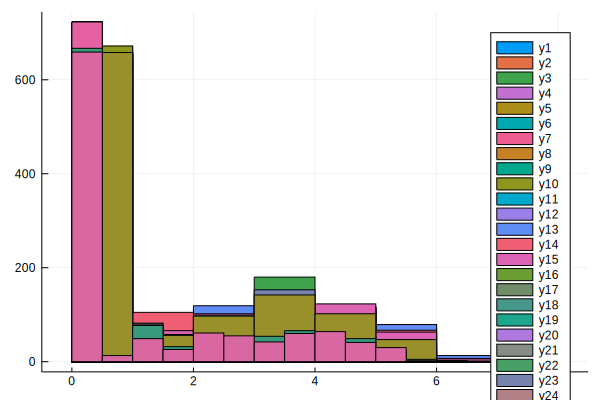

,variable,mean,std,min,q25,median,q75,max
,Symbol,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,x1,1.17538,1.63181,0.0,0.0,0.0,2.56495,7.64156
2,x2,1.05317,1.58497,0.0,0.0,0.0,2.35024,5.69036
3,x3,1.26843,1.68151,0.0,0.0,0.0,2.99573,5.78996
4,x4,1.12988,1.5845,0.0,0.0,0.0,2.3979,5.90536
5,x5,1.14855,1.58716,0.0,0.0,0.0,2.3979,7.25488
6,x6,1.41125,1.97174,0.0,0.0,0.0,3.04452,7.64156
7,x7,1.27281,1.91749,0.0,0.0,0.0,2.8029,6.55108
8,x8,1.49315,1.99026,0.0,0.0,0.0,3.04452,6.66313
9,x9,1.35359,1.90964,0.0,0.0,0.0,2.99448,6.55251


182-element Array{Date,1}:
 2019-05-01
 2019-05-02
 2019-05-03
 2019-05-04
 2019-05-05
 2019-05-06
 2019-05-07
 2019-05-08
 2019-05-09
 2019-05-10
 2019-05-11
 2019-05-12
 2019-05-13
 ⋮         
 2019-10-18
 2019-10-19
 2019-10-20
 2019-10-21
 2019-10-22
 2019-10-23
 2019-10-24
 2019-10-25
 2019-10-26
 2019-10-27
 2019-10-28
 2019-10-29

In [121]:
x_values = DataFrame([log.(col.+1) for col = eachcol(x_train[:, Not(:date)])])
display(histogram(convert(Matrix, x_values)))
display(describe(x_values, :mean, :std, :min, :q25, :median, :q75, :max))
x_train_log = log.(x_train[:, Not(:date)] .+ 1)
x_pred_log = log.(x_pred[:, Not(:date)] .+ 1)
x_train_log.date = x_train.date
x_pred_log.date = x_pred.date

# MULTICOLINEARITY

In [122]:
CUTOFF_PCA = 10
@sk_import decomposition : PCA

PyObject <class 'sklearn.decomposition.pca.PCA'>

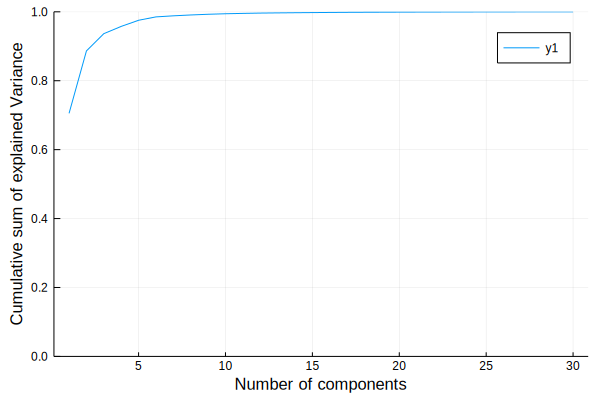

In [123]:
pca = PCA()
x_train_matrix = pca.fit_transform(toArray(x_train))
explained_variance = cumsum(pca.explained_variance_ratio_)
display(Plots.plot(
    1:length(explained_variance),
    explained_variance,
    ylims=(0, 1.0),
    xlabel="Number of components",
    ylabel="Cumulative sum of explained Variance"
))

x_train_pca = DataFrame(
    date=x_train[!,:date],
    x₁=x_train_matrix[:,1],
    x₂=x_train_matrix[:,2],
    x₃=x_train_matrix[:,3],
    x₄=x_train_matrix[:,4],
    x₅=x_train_matrix[:,5],
    x₆=x_train_matrix[:,6],
    x₇=x_train_matrix[:,7],
    x₈=x_train_matrix[:,8],
    x₉=x_train_matrix[:,9],
    x₁₀=x_train_matrix[:,10],
);

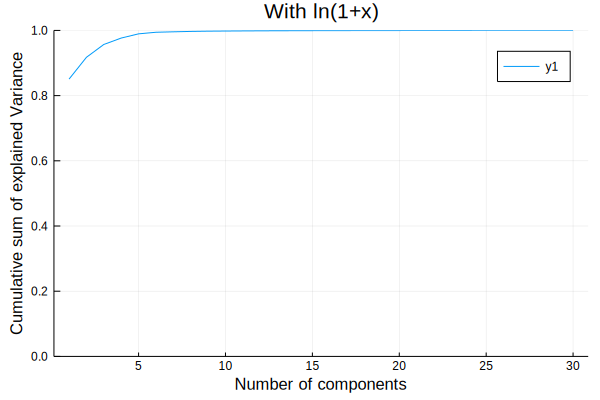

In [124]:
pca = PCA()
x_train_log_matrix = pca.fit_transform(toArray(x_train_log))
explained_variance = cumsum(pca.explained_variance_ratio_)
display(Plots.plot(
    1:length(explained_variance),
    explained_variance,
    ylims=(0, 1.0),
    xlabel="Number of components",
    ylabel="Cumulative sum of explained Variance",
    title="With ln(1+x)"
))

x_train_log_pca = DataFrame(
    date=x_train[!,:date],
    x₁=x_train_log_matrix[:,1],
    x₂=x_train_log_matrix[:,2],
    x₃=x_train_log_matrix[:,3],
    x₄=x_train_log_matrix[:,4],
    x₅=x_train_log_matrix[:,5],
    x₆=x_train_log_matrix[:,6],
    x₇=x_train_log_matrix[:,7],
    x₈=x_train_log_matrix[:,8],
    x₉=x_train_log_matrix[:,9],
    x₁₀=x_train_log_matrix[:,10],
);

# Data Split

In [125]:
Y = y_train
X = x_pred
X_PCA = x_train_pca
X_LOG_PCA = x_train_log_pca
X_BASE = x_train
X_BASE_LOG = x_train_log

function dataSplit(ouvrage, x_data) #HERE
    y = getOuvrage(Y, ouvrage)
    y_train, y_test = splitdataframe(y, .80)

    x_train = getDataFromDates(x_data, y_train.date)
    y_train = getDataFromDates(y_train, x_train.date)

    x_test = getDataFromDates(x_data, y_test.date)
    y_test = getDataFromDates(y_test, x_test.date)
    
    return x_train, x_test, y_train, y_test
end

dataSplit (generic function with 1 method)

# MODELS

In [126]:
@sk_import metrics: f1_score;

In [127]:
function train_on_all_ouvrages(model_contructor::Function, data, cutoff)
    pred = []
    test = []
    for ouvrage in ouvrages
        x_train, x_test, y_train, y_test = dataSplit(ouvrage, data)
        
        x_train = toArray(x_train); x_test = toArray(x_test);
        y_train = toArray(y_train); y_test = toArray(y_test);
        
        x_train = x_train[:, 1:cutoff]
        x_test = x_test[:, 1:cutoff]
        
        model = model_contructor(x_train, y_train)
        
        prediction = model.predict(x_test);
        
        push!(test, y_test)
        push!(pred, prediction)
    end
    
    pred = collect(Iterators.flatten(pred))
    test = collect(Iterators.flatten(test))
    return f1_score(pred,test)
end

train_on_all_ouvrages (generic function with 1 method)

## Logistic Regression

In [128]:
@sk_import linear_model: LogisticRegression
function modeleLogistique(x_train, y_train) 
    model = LogisticRegression(
        penalty="l2",
        solver="liblinear",
        random_state=234,
    )
    model.fit(x_train, y_train);
    return model
end

modeleLogistique (generic function with 1 method)

## Modele de regression gausienne naive

In [129]:
@sk_import naive_bayes: GaussianNB
function modeleNaifGauss(xtrain, ytrain)
    model = GaussianNB()
    model.fit(xtrain, ytrain);
    return model
end

modeleNaifGauss (generic function with 1 method)

## Modele de regression bernoulli naive

In [130]:
@sk_import naive_bayes: BernoulliNB
function modeleNaifBernoulli(xtrain, ytrain)
    model = BernoulliNB()
    model.fit(xtrain, ytrain);
    return model
end

modeleNaifBernoulli (generic function with 1 method)

## Modele de l'arbre de Decision

In [131]:
@sk_import tree: DecisionTreeClassifier
function modeleArbreDecisif(x_train, y_train)
    model = DecisionTreeClassifier(
        random_state=234,
    )
    model.fit(x_train, y_train);
    return model
end

modeleArbreDecisif (generic function with 1 method)

## Ridge Classifier

*TODO* explain but super ez to explain (Ridge that transforms {0,1} -> [-1, 1] )

In [132]:
@sk_import linear_model: RidgeClassifier
function modeleClassificationRidge(x_train, y_train)
    model = RidgeClassifier(
        alpha=.5,
    )
    model.fit(x_train, y_train);
    return model
end

modeleClassificationRidge (generic function with 1 method)

# Train All Models

In [133]:
function get_avg_f1(m, iterations, data, cutoff)
    score=[]
    for i = 1:iterations
        f1 = train_on_all_ouvrages(m, data, cutoff);
        push!(score,f1)
    end
    f1 = mean(score)
    f1 = round(f1, digits=4)
    return f1
end

get_avg_f1 (generic function with 1 method)

In [134]:
ITERATIONS=20
display("$(ITERATIONS)  iterations")

models = [
    modeleLogistique,
    modeleNaifGauss,
    modeleNaifBernoulli,
    modeleArbreDecisif,
    modeleClassificationRidge,
];

dataSets = [
    (x_train, "no pca without log", "no itr"),
    (x_train_log, "no pca with log", "no itr"),
    (X_PCA, "pca without log", "with itr"),
    (X_LOG_PCA, "pca with log", "with itr")
];

best_f1 = 0
best_model = []

# TODO -> VALIDATE DATASETS
for m in models
    model_f1 = []
    display("======= $(string(m)) ======")
    for data in dataSets
        dataSet = data[1]; data_name = data[2]; is_itr = data[3];
        display("------- $(data_name) ------")
        if is_itr == "with itr"
            for pca_cutoff = 1:CUTOFF_PCA
                f1 = get_avg_f1(m, ITERATIONS, dataSet, pca_cutoff)
                push!(model_f1, f1)
                display(f1)

                if f1 > best_f1
                    best_f1 = f1
                    best_model = [f1, string(m), data_name, pca_cutoff]
                end
            end
        else
            n_cols = size(dataSet[:, Not(:date)], 2)
            f1 = get_avg_f1(m, ITERATIONS, dataSet, n_cols)
                push!(model_f1, f1)
                display(f1)

                if f1 > best_f1
                    best_f1 = f1
                    best_model = [f1, string(m), data_name, n_cols]
            end
        end
    end
    display("MAX f1 for Model $(maximum(model_f1))")
end

display("BEST MODEL IS $(best_model[2]), with f1: $(best_model[1]), dataset: $(best_model[3]), pca cutoff: $(best_model[4])")

"20  iterations"

"======= modeleLogistique ======"

"------- no pca without log ------"

0.6596

"------- no pca with log ------"

0.6377

"------- pca without log ------"

0.6891

0.6616

0.6905

0.6911

0.6837

0.7166

0.717

0.6895

0.7174

0.7118

"------- pca with log ------"

0.6565

0.6477

0.6552

0.6598

0.6551

0.6814

0.6772

0.6709

0.6763

0.6744

"MAX f1 for Model 0.7174"

"======= modeleNaifGauss ======"

"------- no pca without log ------"

0.6352

"------- no pca with log ------"

0.5135

"------- pca without log ------"

0.6941

0.6747

0.6258

0.6091

0.5989

0.6092

0.6016

0.5874

0.5995

0.5869

"------- pca with log ------"

0.6988

0.6669

0.6592

0.6601

0.655

0.6372

0.6264

0.5855

0.5709

0.5748

"MAX f1 for Model 0.6988"

"======= modeleNaifBernoulli ======"

"------- no pca without log ------"

0.4152

"------- no pca with log ------"

0.4082

"------- pca without log ------"

0.4243

0.5316

0.4912

0.4874

0.482

0.4878

0.4873

0.5004

0.4804

0.4903

"------- pca with log ------"

0.4117

0.261

0.3563

0.3575

0.3599

0.4224

0.417

0.4199

0.408

0.407

"MAX f1 for Model 0.5316"

"======= modeleArbreDecisif ======"

"------- no pca without log ------"

0.6413

"------- no pca with log ------"

0.6276

"------- pca without log ------"

0.587

0.5971

0.6008

0.6231

0.6295

0.6289

0.5892

0.6097

0.6258

0.6055

"------- pca with log ------"

0.5911

0.6037

0.5972

0.6162

0.6207

0.633

0.6269

0.6227

0.6203

0.6221

"MAX f1 for Model 0.6413"

"======= modeleClassificationRidge ======"

"------- no pca without log ------"

0.6111

"------- no pca with log ------"

0.5125

"------- pca without log ------"

0.4926

0.5987

0.578

0.575

0.5682

0.5829

0.5999

0.5788

0.6161

0.6232

"------- pca with log ------"

0.4201

0.4232

0.411

0.4295

0.4328

0.4445

0.4409

0.453

0.4469

0.462

"MAX f1 for Model 0.6232"

"BEST MODEL IS modeleLogistique, with f1: 0.7174, dataset: pca without log, pca cutoff: 9"

ase change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/williamglazer/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/williamglazer/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/williamglazer/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/williamglazer/anaconda3/lib/python3.6/site-package

**HIGHLIGHTS**

Modele logistique .7174 avec pca sans log et cutoff 9

Modele Naif Gauss .6988 avec pca avec log et cutoff 1

## Recreer les meilleurs modeles et les entrainer

In [159]:
modelesLogistiques = DataFrame(NO_OUVRAGE = [], modele = [])
cutoff = 9
data = X_PCA

for ouvrage in ouvrages
    y_train = getOuvrage(Y, ouvrage)
    
    x_train = getDataFromDates(data, y_train.date)
    y_train = getDataFromDates(y_train, x_train.date)
    
    model = modeleLogistique(toArray(x_train)[:, 1:cutoff], toArray(y_train));

    push!(modelesLogistiques, [ouvrage, model])
end

In [161]:
modelesNaifGauss = DataFrame(NO_OUVRAGE = [], modele = [])
cutoff = 1
data = X_LOG_PCA

for ouvrage in ouvrages
    y_train = getOuvrage(Y, ouvrage)
    
    x_train = getDataFromDates(data, y_train.date)
    y_train = getDataFromDates(y_train, x_train.date)
    
    model = modeleNaifGauss(toArray(x_train)[:, 1:cutoff], toArray(y_train));
    push!(modelesNaifGauss, [ouvrage, model])
end

## Formatter les predictions en consequences

In [167]:
pca = PCA(n_components=9)
x_pred_log_pca = pca.fit_transform(toArray(x_pred))
x_pred_logistique = DataFrame(
    date=x_pred[!,:date],
    x₁=x_pred_log_pca[:,1],
    x₂=x_pred_log_pca[:,2],
    x₃=x_pred_log_pca[:,3],
    x₄=x_pred_log_pca[:,4],
    x₅=x_pred_log_pca[:,5],
    x₆=x_pred_log_pca[:,6],
    x₇=x_pred_log_pca[:,7],
    x₈=x_pred_log_pca[:,8],
    x₉=x_pred_log_pca[:,9],
);

In [168]:
x_pred_log = log.(x_pred[:, Not(:date)] .+ 1)
pca = PCA(n_components=1)
x_pred_log_pca = pca.fit_transform(toArray(x_pred))
x_pred_naif = DataFrame(
    date=x_pred[!,:date],
    x₁=x_pred_log_pca[:,1],
);

## Mise en place des valeurs cherchees

In [169]:
test = CSV.read("data/test.csv")
df = test[:, [:NO_OUVRAGE, :DATE]]
rename!(df, :DATE=>:date)
X_logistique = join(df, x_pred_logistique, on=:date)
X_naif = join(df, x_pred_naif, on=:date)

,NO_OUVRAGE,date,x₁
,String,Date,Float64
1,3260-01D,2019-05-02,-26.1991
2,3260-01D,2019-05-09,227.647
3,3260-01D,2019-05-10,992.691
4,3260-01D,2019-05-15,-131.383
5,3260-01D,2019-05-20,69.7872
6,3260-01D,2019-05-23,717.817
7,3260-01D,2019-05-24,-56.2661
8,3260-01D,2019-05-26,-95.0148
9,3260-01D,2019-05-30,-84.7144


In [170]:
function predictValues(dataframe, modeles)
    predictions = []
    for x in eachrow(dataframe)
        modele = filter(row -> row.NO_OUVRAGE == x.NO_OUVRAGE, modeles).modele[1]
        predictions = vcat(predictions, modele.predict([toArray(x)]))
    end
    return round.(predictions)
end

predictValues (generic function with 1 method)

In [171]:
predictionsLogit = predictValues(X_logistique, modelesLogistiques)

283-element Array{Int64,1}:
 0
 0
 1
 0
 0
 0
 0
 0
 0
 1
 0
 0
 1
 ⋮
 0
 1
 1
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [172]:
predictionsNaif = predictValues(X_naif, modelesNaifGauss)

283-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 1
 0
 1
 1
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [173]:
#Nombre de diff entre Tree et Logit
sum(abs.(predictionsLogit-predictionsNaif))

56

# Création du fichier de prédictions pour soumettre sur Kaggle

Dans ce cas-ci, nous prédirons une surverse avec une prediction logistique

In [174]:
# Création du fichier sampleSubmission.csv pour soumettre sur Kaggle
ID = test[:,:NO_OUVRAGE].*"_".*string.(test[:,:DATE])
sampleSubmission = DataFrame(ID = ID, Surverse=predictionsNaif)
CSV.write("submission_naif.csv",sampleSubmission)

# Vous pouvez par la suite déposer le fichier sampleSubmission.csv sur Kaggle.

"submission_naif.csv"

In [175]:
# Création du fichier sampleSubmission.csv pour soumettre sur Kaggle
ID = test[:,:NO_OUVRAGE].*"_".*string.(test[:,:DATE])
sampleSubmission = DataFrame(ID = ID, Surverse=predictionsLogit)
CSV.write("submission_logit.csv",sampleSubmission)

# Vous pouvez par la suite déposer le fichier sampleSubmission.csv sur Kaggle.

"submission_logit.csv"